1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까>?
-분석을 통해 가설을 검정해 봅니다.

3. 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러옵니다.
# 또, 구 버전의 주피터 노트불에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그래도 주석처리를 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요.
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm 

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

#Colab 의 한글 폰트 설정
# pit,rc('font', family='NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [3]:
# 한글 폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다. 
# 한굴이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체재별 설정을 위해 로드 합니다.
import os

# 윈도우, 맥 외의 os는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", familu="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

데이터 불러오기
-국민건강보험.

In [5]:
# 다운로드 받은 파일을 판다수의 read_csv를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding="cp949")
df.shape

(1000000, 34)

5.1 데이터 미리보기

In [6]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [7]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [8]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
262079,2017,262080,1,10,27,165,65,81.0,1.0,1.0,...,31.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


6 기본정보 보기

In [9]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes를 통해 데이터 형식만 출력합니다. 
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

7 결측치 보기

In [12]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수르 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [13]:
# isna로도 결측치 여부를 확인하고 sum을 토앻 결측치 수를 집계할 수 있습니다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<Axes: >

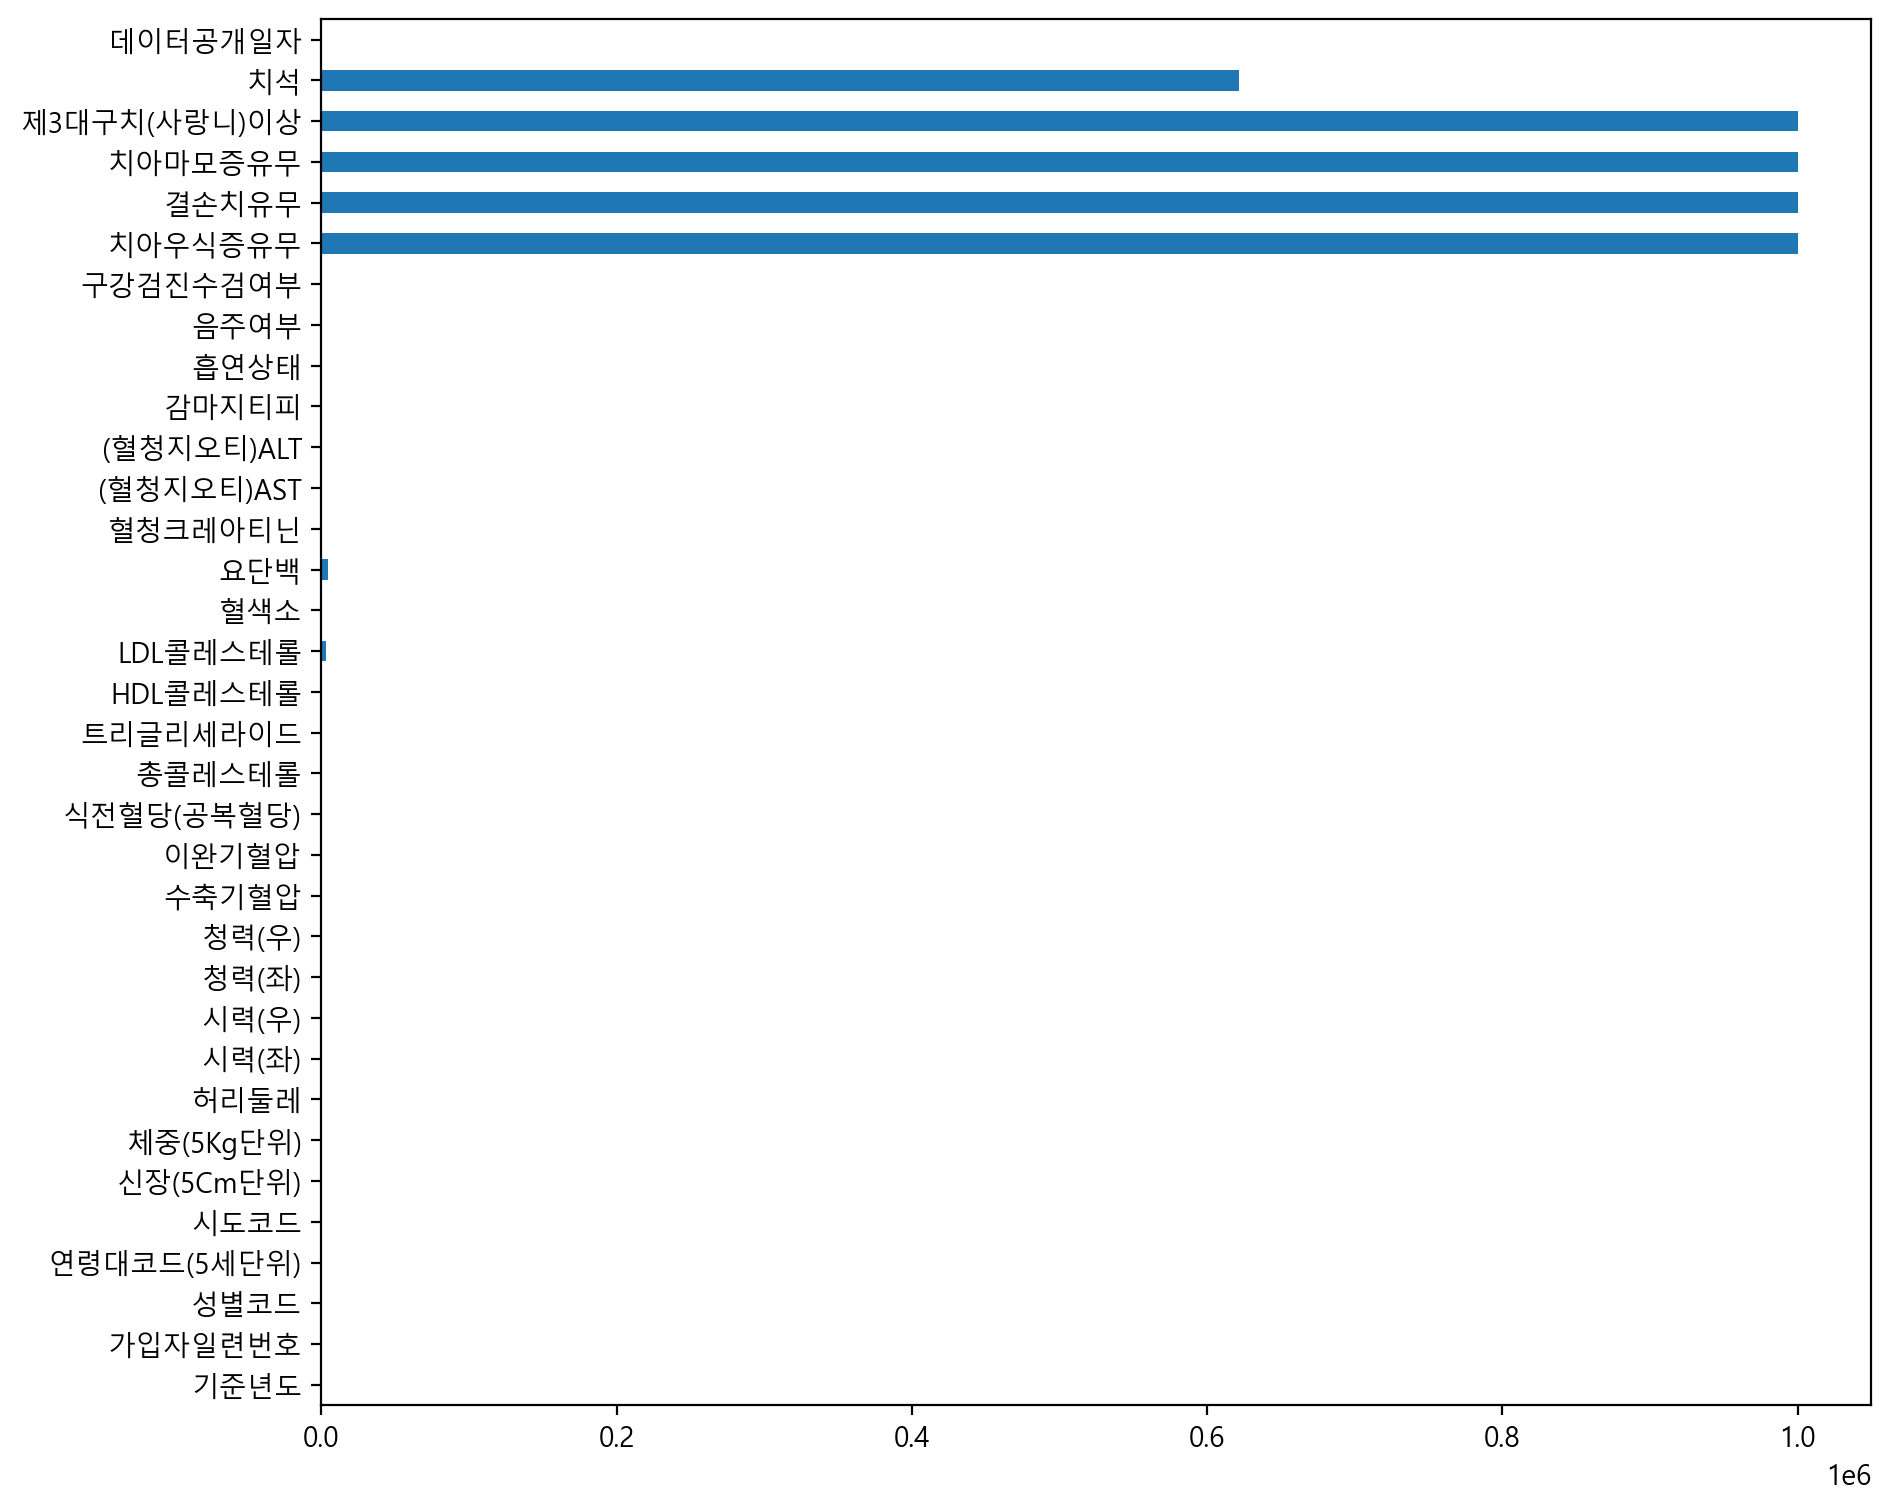

In [14]:
# 판다스에 내장된 plot을 통해 시각화를 합니다.
df.isnull().sum().plot.barh(figsize=(10, 9))

8 일부 데이터 요약하기

In [15]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기 합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [16]:
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 용약합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


9 value_counts 로 값 집계하기

In [17]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.
df["성별코드"].value_counts()

성별코드
1    530410
2    469590
Name: count, dtype: int64

In [18]:
# value_counts를 통해 흡연상태롤 그룹화 하고 갯수를 집계합니다.
df["흡연상태"].value_counts()

흡연상태
1.0    607942
3.0    215702
2.0    176212
Name: count, dtype: int64

10 groupby와 ,pibot_table 사용하기

10.1 groupby

In [19]:
# groupby를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [20]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [22]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [23]:
# agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

10.2 pivot_table